In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("X_treadmill.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


1) Defining Problem Statement and Analysing basic metrics

X is a leading brand in the field of fitness equipements and accessories. 
In this project, we have sales data of X's traedmills. We would analyze this data through various parameters to provide insights and recommendations to get a better prespective of customer profiles. Hopefully, this would result in  better customer profiling and X's stakeholders would improve their sales starategy so as to expand their business and profits.

In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


2) Non-Graphical Analysis: Value counts and unique attributes
3) Visual Analysis - Univariate & Bivariate

We will do value count and their visual analysis together in this step.

(Product           3
 Age              32
 Gender            2
 Education         8
 MaritalStatus     2
 Usage             6
 Fitness           5
 Income           62
 Miles            37
 dtype: int64,
 <Axes: >)

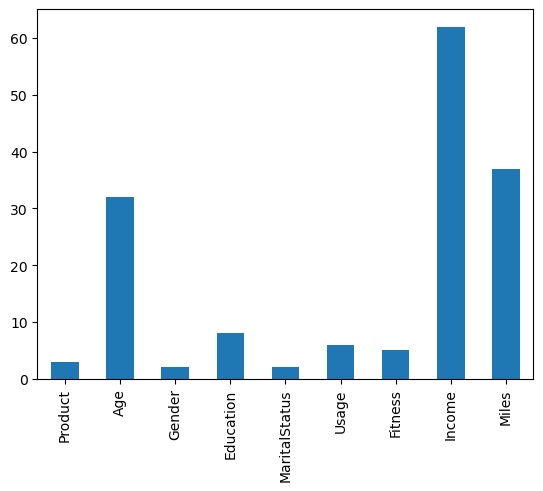

In [7]:
df.nunique(), df.nunique().plot(kind="bar")

-> Above analysis shows number of unique values for each column. While most of the value are within expected range, it is clear that income, miles and age, which are continuous right now, needs to be handled in different manner for batter analysis. This is due to high number of values distribution in them as compared to other columns.


(KP281    80
 KP481    60
 KP781    40
 Name: Product, dtype: int64,
 <Axes: >)

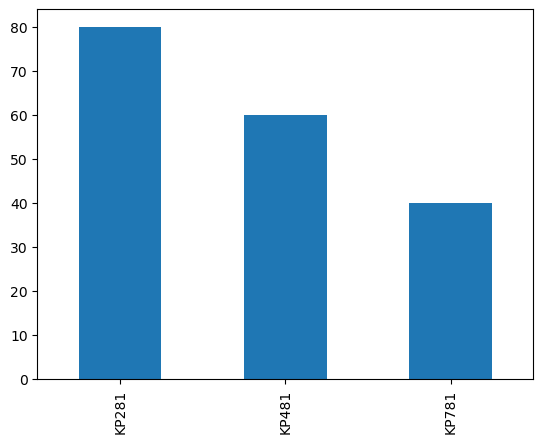

In [8]:
df["Product"].value_counts(), df["Product"].value_counts().plot(kind="bar")

-> Only three values are there and it is clear from above results that treadmill "KP281" has highest value concentration among three tradmills.


(Male      104
 Female     76
 Name: Gender, dtype: int64,
 <Axes: >)

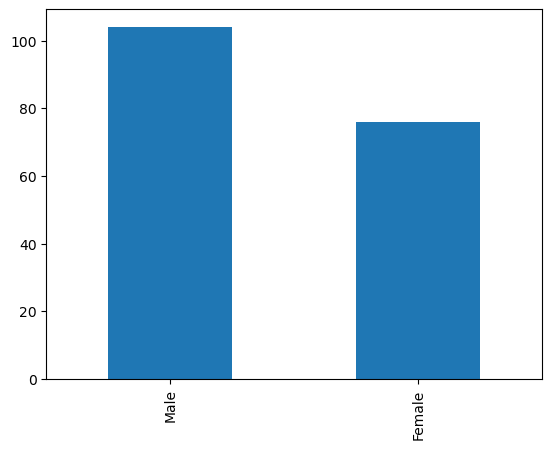

In [9]:
df["Gender"].value_counts(), df["Gender"].value_counts().plot(kind="bar")

-> We can deduce from above that male customers are more than female customers by a margin of 50%.


(16    85
 14    55
 18    23
 15     5
 13     5
 12     3
 21     3
 20     1
 Name: Education, dtype: int64,
 <Axes: xlabel='Education', ylabel='count'>)

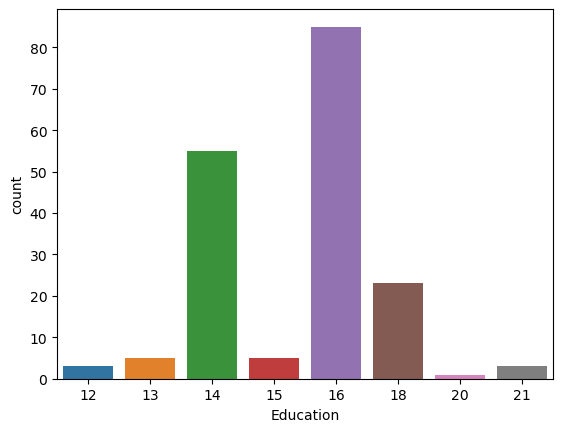

In [10]:
x = df["Education"].value_counts()
x, sns.countplot(data=df,x="Education")

-> Values in education variable are within range of 12-21 years. 90% of data is located within 14-18 years range.


(Partnered    107
 Single        73
 Name: MaritalStatus, dtype: int64,
 <Axes: >)

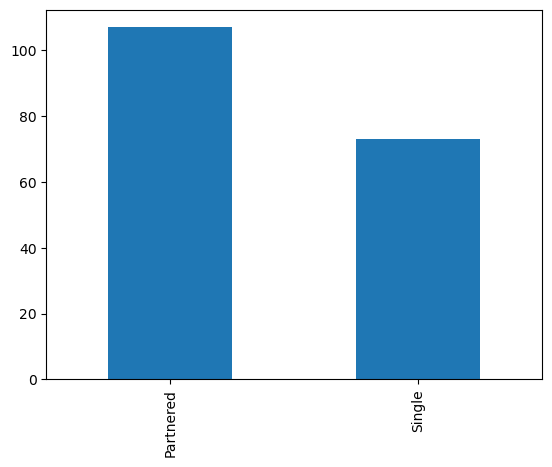

In [11]:
df["MaritalStatus"].value_counts(), df["MaritalStatus"].value_counts().plot(kind="bar")

-> For maritual status values, "Partnered" values are more than "Single" by a margin of nearly 50%.


(3    69
 4    52
 2    33
 5    17
 6     7
 7     2
 Name: Usage, dtype: int64,
 <Axes: >)

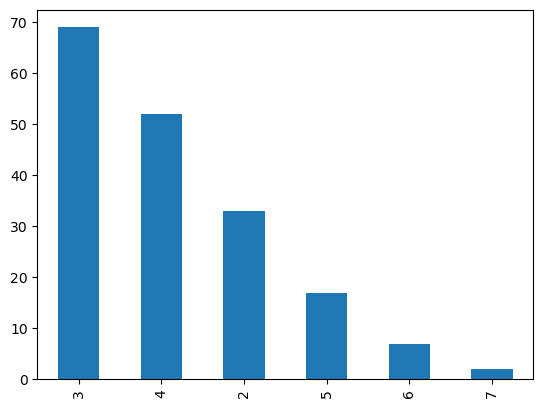

In [12]:
df["Usage"].value_counts(), df["Usage"].value_counts().plot(kind="bar")

-> Usage values vary in the range of [3-7]. More than 90% of values are fall within range of [2-5].


(3    97
 5    31
 2    26
 4    24
 1     2
 Name: Fitness, dtype: int64,
 <Axes: >)

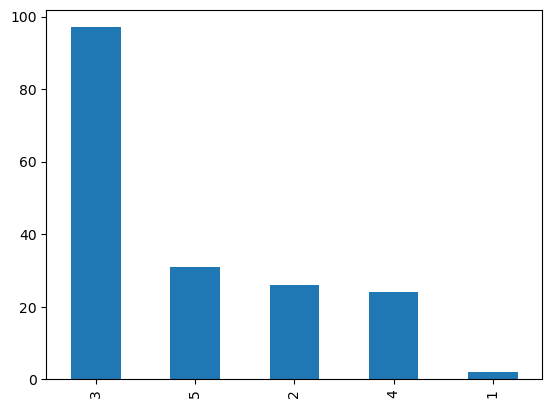

In [13]:
df["Fitness"].value_counts(), df["Fitness"].value_counts().plot(kind="bar")

-> Values are within range of [1-5] with highest number of values being assigned to 3.


In [14]:
x= df["Income"].value_counts()
x, x.index.min(),x.index.max()

(45480    14
 52302     9
 46617     8
 54576     8
 53439     8
          ..
 65220     1
 55713     1
 68220     1
 30699     1
 95508     1
 Name: Income, Length: 62, dtype: int64,
 29562,
 104581)

<Axes: xlabel='Income', ylabel='Count'>

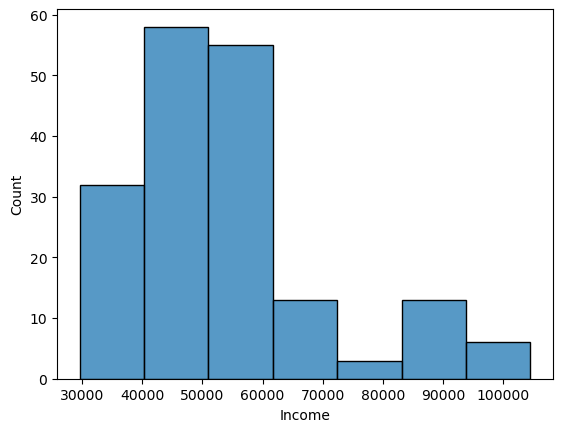

In [15]:
sns.histplot(data=df,x="Income", bins=7)

-> From above analysis, it is clear that "Income" column has vast variations in values. The range of values is [29562-104581]. The majority of values are concentrated in [30000-60000] range.


In [16]:
df["Miles"].value_counts(), (df["Miles"].max(), df["Miles"].min())

(85     27
 95     12
 66     10
 75     10
 47      9
 106     9
 94      8
 113     8
 53      7
 100     7
 180     6
 200     6
 56      6
 64      6
 127     5
 160     5
 42      4
 150     4
 38      3
 74      3
 170     3
 120     3
 103     3
 132     2
 141     2
 280     1
 260     1
 300     1
 240     1
 112     1
 212     1
 80      1
 140     1
 21      1
 169     1
 188     1
 360     1
 Name: Miles, dtype: int64,
 (360, 21))

<Axes: xlabel='Miles', ylabel='Count'>

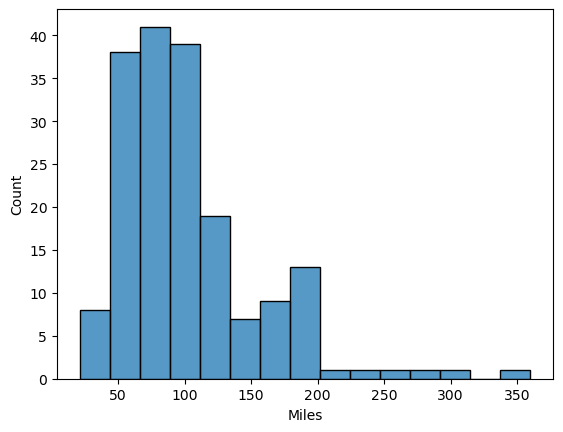

In [17]:
sns.histplot(data=df,x="Miles", bins=15)

-> The value range of this column is as wide as "Income" column with a range of [21-360]. The range [50-100] is having maximum concentration of values.


In [18]:
df["Age"].value_counts().sort_index()

18     1
19     4
20     5
21     7
22     7
23    18
24    12
25    25
26    12
27     7
28     9
29     6
30     7
31     6
32     4
33     8
34     6
35     8
36     1
37     2
38     7
39     1
40     5
41     1
42     1
43     1
44     1
45     2
46     1
47     2
48     2
50     1
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

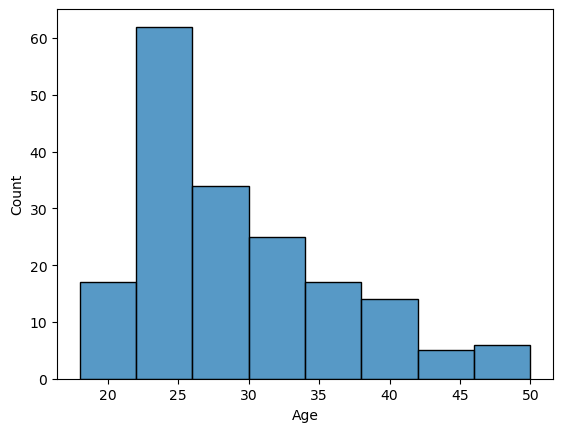

In [19]:
sns.histplot(data=df,x="Age", bins=8)

-> The total range of values [18-50] is less as compared to "Income" and "Miles" column. [20-26] age range is having highest number of values but other age ranges are also fairly well represented. Concentration is higher for lower ranges as comapred to upper ranges.


C:\Users\Sanket Kaushik\AppData\Local\Temp\ipykernel_24068\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

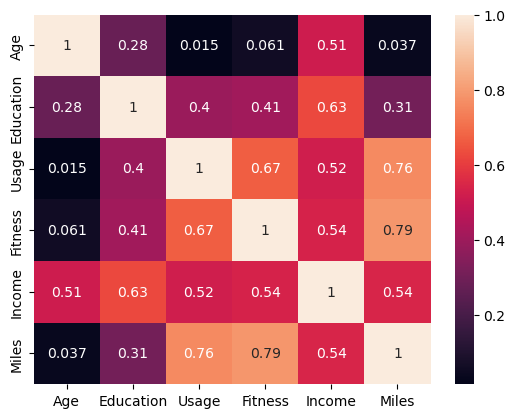

In [20]:
sns.heatmap(df.corr(),annot=True)

-> We see high correlation in various parameters like "Miles-Fitness" and "Miles-Usage". We will plot detailed graphs for some of these parameters.


<Axes: xlabel='Age', ylabel='Income'>

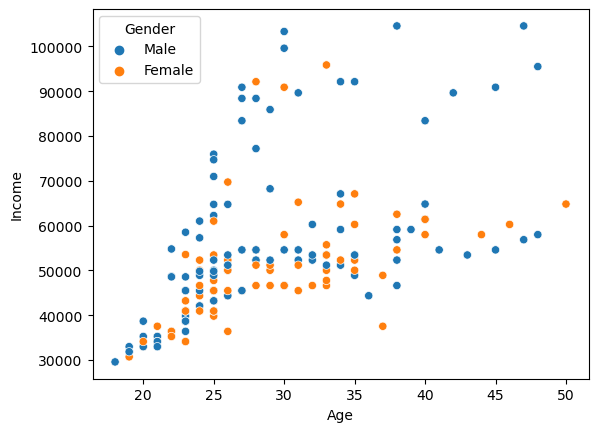

In [21]:
sns.scatterplot(data=df,x = "Age",y="Income",hue="Gender")

-> This shows that in this data while there is nearly equal representation of both male and female on low age and low income, higher value ranges of this category are dominated by male.


<Axes: xlabel='Age', ylabel='Income'>

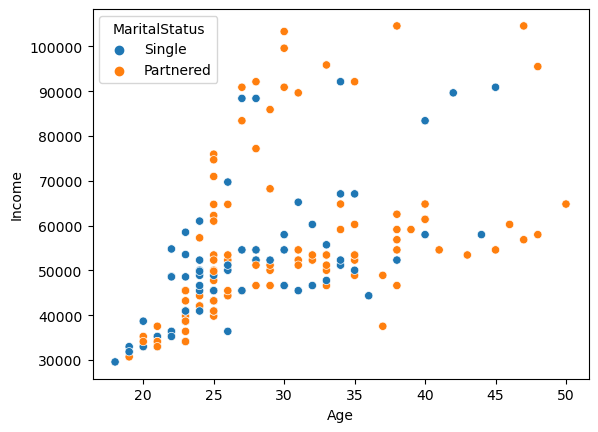

In [22]:
sns.scatterplot(data=df, x = "Age",y="Income",hue="MaritalStatus")

-> "Partnered" value is clearly in majority in "Age-Income" analysis.


<Axes: xlabel='Age', ylabel='Income'>

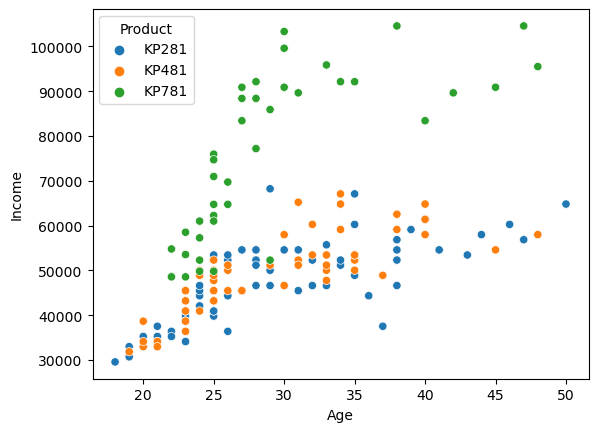

In [23]:
sns.scatterplot(data=df, x = "Age",y="Income",hue="Product")

<Axes: xlabel='MaritalStatus', ylabel='count'>

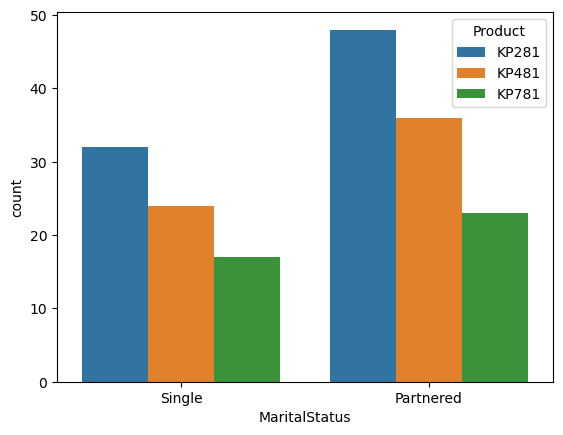

In [24]:
sns.countplot(data=df,x="MaritalStatus",hue="Product")

-> Again, the "Partnered" values clearly have more data points than "Single" value across all product range.


-> The most expensive of the treadmills "KP781" sale is majorly located between age group [22-35] and only choice of higher income ranges.


<Axes: xlabel='Gender', ylabel='count'>

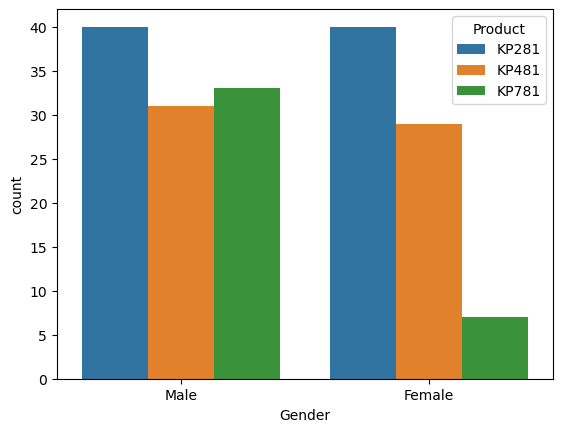

In [25]:
sns.countplot(data=df,x="Gender",hue="Product")

-> While sale of other products is nearly the same, most expensive product "KP781" has most of the data in male catgory.


<Axes: xlabel='Age', ylabel='Miles'>

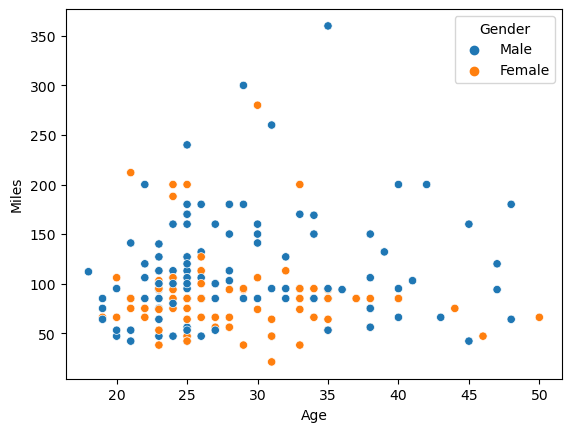

In [26]:
sns.scatterplot(data=df, x = "Age",y="Miles",hue="Gender")

-> Except one male outlier, the data seems to be dominated by male. This might be due to more male values in overall data. But even then, higher miles are clearly dominated by female.


<Axes: xlabel='Age', ylabel='Miles'>

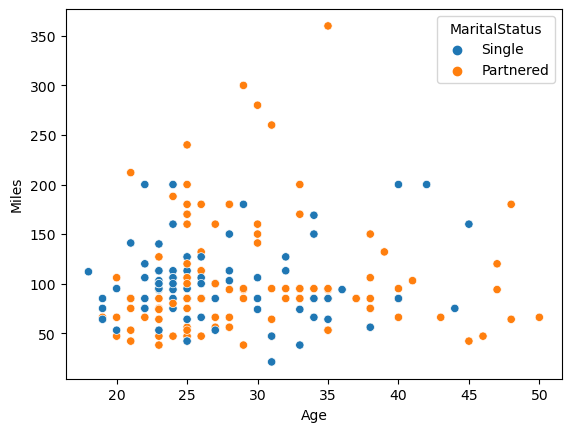

In [27]:
sns.scatterplot(data=df, x = "Age",y="Miles",hue="MaritalStatus")

-> Although, "Partnered" have more values in data but the "Age-Miles" analysis is nearly equally represented with higher ranges of both clearly dominated be "Partnered" values.


<Axes: xlabel='Age', ylabel='Miles'>

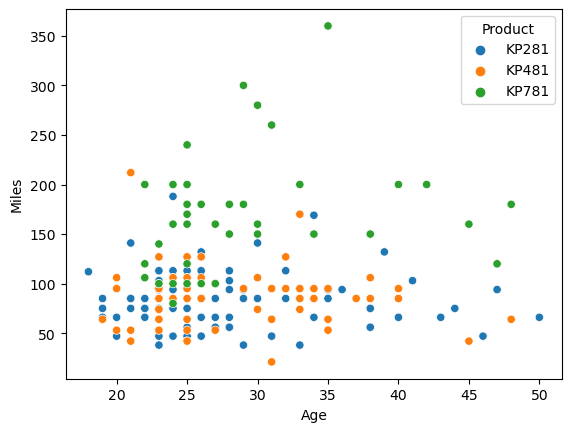

In [28]:
sns.scatterplot(data=df, x = "Age",y= "Miles",hue="Product")

-> The higher ranges of "Age-Miles" are specifically populated by most expensive product "KP781". The lower ranges as per "Miles" have mixed representation of other two products.


<Axes: xlabel='Education', ylabel='count'>

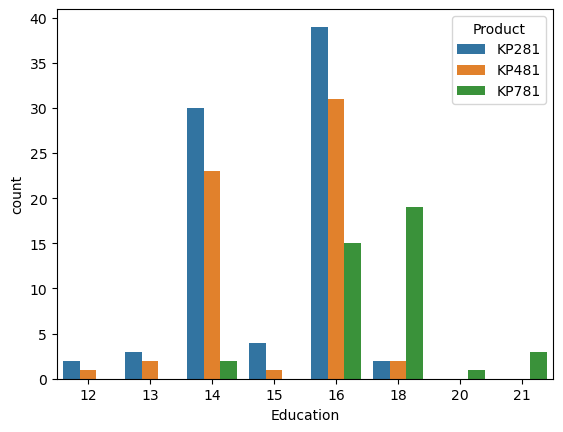

In [29]:
sns.countplot(data=df,x="Education", hue="Product")

-> Higher Education groups are exclusive to the most expensive product, while middle and lower value ranges are domainated by other two products.


<Axes: xlabel='Miles', ylabel='Income'>

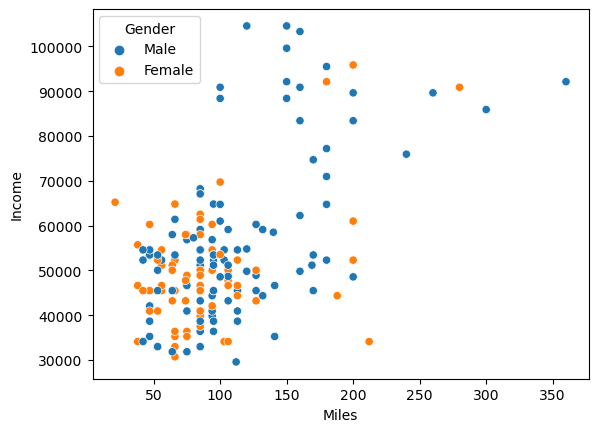

In [30]:
sns.scatterplot(data=df,x="Miles",y="Income",hue="Gender")

-> Higher ranges of Miles and income are dominated by male and lower values have nearly equal representation.


<Axes: xlabel='Miles', ylabel='Income'>

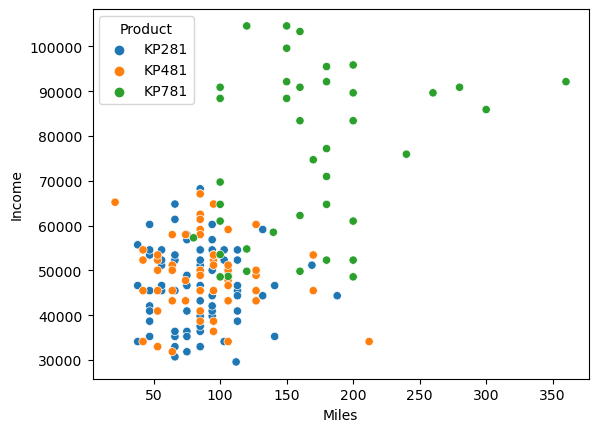

In [31]:
sns.scatterplot(data=df,x="Miles",y="Income",hue="Product")

-> Higher values are dominated by most expensive product speacifically. In lower ranges are dominated by other two products.


<Axes: xlabel='Fitness', ylabel='Usage'>

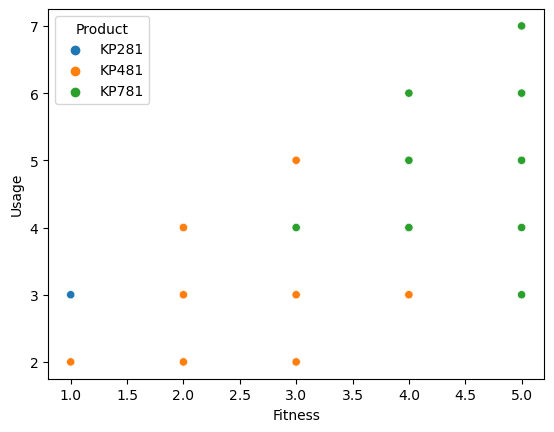

In [32]:
sns.scatterplot(data=df,x="Fitness",y="Usage",hue="Product")

-> Cutomers in higher ranges of fitness level and expect high usage tends to buy the most expensive treadmill.


<Axes: xlabel='Age', ylabel='Usage'>

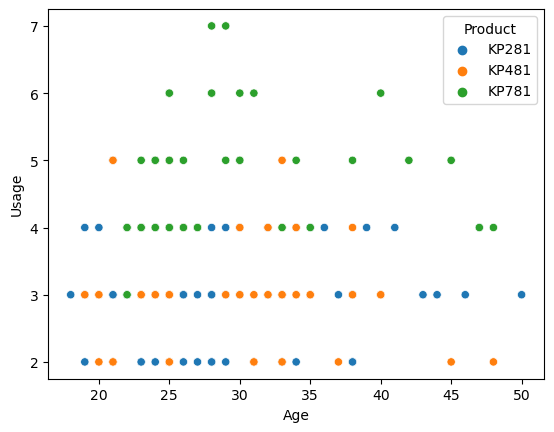

In [33]:
sns.scatterplot(data=df,x="Age",y="Usage",hue="Product")

-> Those who expect high usage tends to prefer the expensive treadmill more across all age data points. Lower ranges of usage are dominated by other two products. Most data is between [2-5] days range with higher usages mostly limited to [25-30] age range.


<Axes: xlabel='Fitness', ylabel='Miles'>

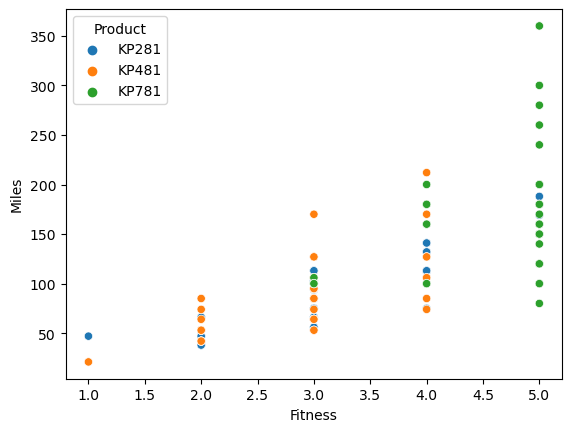

In [34]:
sns.scatterplot(data=df,x="Fitness",y="Miles", hue="Product")

-> Those who have low fitness rating expects to run less, which is strange. These customers mostly purchase entry and mid-level product. AS expected, high fitness level customer who expect high miles and are more inclined towards expensive treadmill.


4) Missing Value & Outlier Detection

We have already done analysis for missing values before. There are no missing values. We will detect outliers.

<Axes: xlabel='Age', ylabel='Gender'>

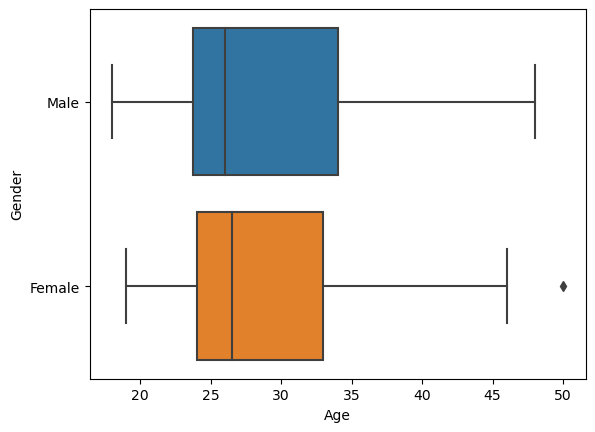

In [35]:
sns.boxplot(data=df,x="Age", y="Gender")

-> Female values are less than male, hence lower and higher values are also low and high than female. Median age is nearly the same with one outlier in female.


<Axes: xlabel='Miles', ylabel='Gender'>

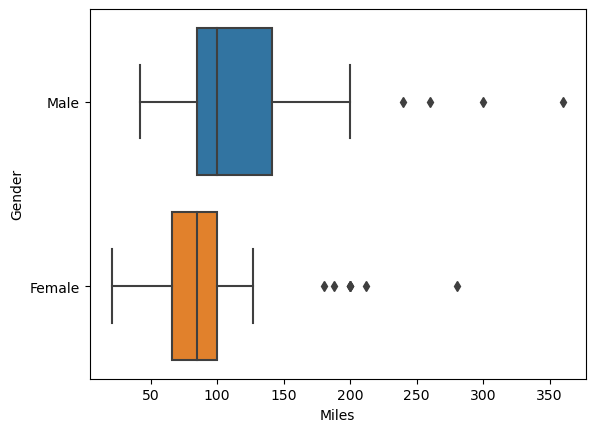

In [36]:
sns.boxplot(data=df,x="Miles", y="Gender")

-> Female has less values in both lower and higher number of miles. Outliers are present in both values.


<Axes: xlabel='Income', ylabel='Gender'>

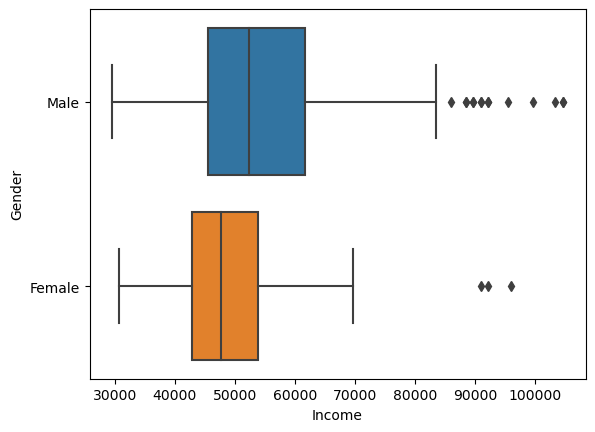

In [37]:
sns.boxplot(data=df,x="Income", y="Gender")

-> Due to high variation in number of values, both male and female data have outliers. The overall value range of female is less than that of male, specifically the higher income values.

5) Descriptive Analysis


Percentage of customers for each product, both male and female

In [38]:

total_entry = np.round(len(df[df["Product"]=="KP281"])/len(df) * 100)
total_mid = np.round(len(df[df["Product"]=="KP481"])/len(df) * 100)
total_high = np.round(len(df[df["Product"]=="KP781"])/len(df) * 100)

print("KP281 =",total_entry,"%")
print("KP481 =", total_mid,"%")
print("KP781 =", total_high,"%")

KP281 = 44.0 %
KP481 = 33.0 %
KP781 = 22.0 %


In [39]:
pd.crosstab(df.Product,df.Gender, normalize="columns").round(2)

Gender,Female,Male
Product,,
KP281,0.53,0.38
KP481,0.38,0.30
KP781,0.09,0.32


-> Above analysis shows that of all customers approx. 44% people bought product "KP281" which is highest among all three products. The probabilty of male buying this product is 0.38 while for female it is 0.53.

-> For product KP481, the number of total buyers is approx. 33% of all buyers. The probability of male buying this product 0.3 while the probabilty for female buyer is 0.38.

-> For most expensive product "KP781", the number of buyers is approx. 22%. The probability of male buying this product 0.32 while the probabilty for female buyer is 0.09.

In [40]:
# Probability of buying each product given gender and marital Status.

pd.crosstab(df.Product,[df.Gender, df.MaritalStatus],normalize="columns").round(2)

Gender           Female             Male       
MaritalStatus Partnered Single Partnered Single
Product                                        
KP281              0.59   0.43      0.34   0.44
KP481              0.33   0.47      0.34   0.23
KP781              0.09   0.10      0.31   0.33

-> From above results, it is clear that product "KP281" has high probabilty of being bought by partnered-female category followed by single male.
The product "KP481" has highest probability of being bought by single female followed by partnered male.
"KP781" has high probabiltiy of being bought by male of both marital status.

In [41]:
# For better analysis, lets do the categorical labeling for continuous values like age, fitness, income etc.

df["Age_class"] = pd.cut(df["Age"],3,labels=["Young", "Middle", "Senior"])
df["Fitness_class"] = pd.cut(df["Fitness"],3,labels=["Low", "Medium", "High"])
df["Income_class"] = pd.cut(df["Income"],3,labels=["Low", "Medium", "High"])
df["Usage_class"] = pd.cut(df["Usage"],3,labels=["Low", "Medium", "High"])
df["Education_class"] = pd.cut(df["Education"],3,labels=["Low", "Medium", "High"])
df["Miles_class"] = pd.cut(df["Miles"],3,labels=["Low", "Medium", "High"])
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_class,Fitness_class,Income_class,Usage_class,Education_class,Miles_class
0,KP281,18,Male,14,Single,3,4,29562,112,Young,High,Low,Low,Low,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Medium,Low,Low,Low,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Medium,Low,Medium,Low,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Medium,Low,Low,Low,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Low,Low,Medium,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Senior,High,High,High,High,Medium
176,KP781,42,Male,18,Single,5,4,89641,200,Senior,High,High,Medium,Medium,Medium
177,KP781,45,Male,16,Single,5,5,90886,160,Senior,High,High,Medium,Medium,Medium
178,KP781,47,Male,18,Partnered,4,5,104581,120,Senior,High,High,Medium,Medium,Low


In [42]:
# Probability of buying each product given gender and age.

pd.crosstab(df.Product,[df.Gender,df.Age_class],normalize="columns").round(2)

Gender    Female                Male              
Age_class  Young Middle Senior Young Middle Senior
Product                                           
KP281       0.58   0.42    0.6  0.39   0.40   0.33
KP481       0.31   0.50    0.4  0.29   0.33   0.25
KP781       0.11   0.08    0.0  0.32   0.27   0.42

-> The probability of Female-Young buying "KP281" is highest. For "KP481", the highest probable customer is Female-Middle. For "KP781", the highest probable customer is Male-Senior and male in general.

In [43]:
# Probability of buying each product given gender and Fitness level.

pd.crosstab(df.Product,[df.Gender,df.Fitness_class],normalize="columns").round(2)

Gender        Female               Male             
Fitness_class    Low Medium  High   Low Medium  High
Product                                             
KP281           0.59   0.58  0.29  0.45   0.54  0.17
KP481           0.41   0.40  0.29  0.55   0.40  0.10
KP781           0.00   0.02  0.43  0.00   0.06  0.73

-> For "KP281", the most probable customers are Female-Low, Female-Medium followed by Male-Medium. For "KP481", the most probable customer is Male-low. For "KP781", the most probable customer is Male-High followed by Female-High.

In [44]:
# Probability of buying each product given age and Fitness.

pd.crosstab(df.Product,[df.Age_class,df.Fitness_class],normalize="columns").round(2)

Age_class     Young              Middle              Senior             
Fitness_class   Low Medium  High    Low Medium  High    Low Medium  High
Product                                                                 
KP281          0.53   0.60  0.19   0.56   0.47  0.24    0.5   0.56  0.17
KP481          0.47   0.33  0.16   0.44   0.53  0.18    0.5   0.44  0.00
KP781          0.00   0.07  0.66   0.00   0.00  0.59    0.0   0.00  0.83

-> Young-Medium age/Fitness has the highest probability of buying "KP281" followed by Young-Low. For "KP481", the highest probability is Middle-Medium followed Young-Low. For "KP781", the highest probability of buying is with Senior-High followed by Young-High.

In [45]:
# Probability of buying each product given Fitness level and usage level.

pd.crosstab(df.Product,[df.Fitness_class,df.Usage_class],normalize="columns").round(2)

Fitness_class   Low        Medium         High            
Usage_class     Low Medium    Low Medium   Low Medium High
Product                                                   
KP281          0.54    0.5   0.57   0.53  0.45   0.17  0.0
KP481          0.46    0.5   0.43   0.34  0.45   0.09  0.0
KP781          0.00    0.0   0.00   0.12  0.09   0.74  1.0

-> Those having low fitness and expect low usage are more likely to buy "KP281". For "KP481", the highest probable buyers are Low fitness and Medium usage. For High fitness-high usage and High fitness-medium usage users, the most probable choice is "KP781".


In [46]:
# Probability of buying each product given gender and Income.

pd.crosstab(df.Product,[df.Gender,df.Income_class],normalize="columns").round(2)

Gender       Female             Male            
Income_class    Low Medium High  Low Medium High
Product                                         
KP281          0.56   0.50  0.0  0.5   0.36  0.0
KP481          0.40   0.38  0.0  0.4   0.25  0.0
KP781          0.04   0.12  1.0  0.1   0.39  1.0

-> Female in low and medium income range are more likely to buy "KP281" than other customers. For "KP481", the most likely customers are Male and female of low income ranges. The high income ranges of both male and female are equally likely to buy "KP781".

In [47]:
# Probability of buying each product given gender and Education level.

pd.crosstab(df.Product,[df.Gender,df.Education_class],normalize="columns").round(2)

Gender          Female              Male            
Education_class    Low Medium High   Low Medium High
Product                                             
KP281             0.61   0.48  0.0  0.54   0.32  0.0
KP481             0.39   0.38  0.0  0.40   0.26  0.0
KP781             0.00   0.14  1.0  0.06   0.42  1.0

-> Female and male of lower education range are most likely to buy "KP281". For "KP481", the most likely customers are Male and female of low education range although less likely than "KP281". Both male and female of high education range almost exclusively buy "KP781".


In [48]:
# Probability of buying each product given Fitness and miles level.

pd.crosstab(df.Product,[df.Fitness_class,df.Miles_class],normalize="columns").round(2)

Fitness_class   Low Medium         High            
Miles_class     Low    Low Medium   Low Medium High
Product                                            
KP281          0.54   0.56    0.0  0.33   0.13  0.0
KP481          0.46   0.40    1.0  0.29   0.07  0.0
KP781          0.00   0.04    0.0  0.38   0.80  1.0

-> The people who expects to clock low ranges of miles across all fitnes level are more likely to buy "KP281". The customer with Medium level of fitness and miles expected exclusively buy "KP481". "KP781" is most likely to be bought by High fitness people with high income-high miles exclusively buying it.


In [49]:
# Probability of buying each product given usage and miles category.

pd.crosstab(df.Product,[df.Usage_class,df.Miles_class],normalize="columns").round(2)

Usage_class   Low Medium               High     
Miles_class   Low    Low Medium High Medium High
Product                                         
KP281        0.55   0.47   0.16  0.0    0.0  0.0
KP481        0.44   0.28   0.12  0.0    0.0  0.0
KP781        0.01   0.26   0.72  1.0    1.0  1.0

-> "KP281" and "KP481" is most likely to be bought by people expecting low usage-low miles. People with high expected miles and high usage exclusively buy "KP781".


In [50]:
# Probability of buying each product given income and usage.

pd.crosstab(df.Product,[df.Income_class,df.Usage_class],normalize="columns").round(2)

Income_class   Low        Medium               High     
Usage_class    Low Medium    Low Medium High Medium High
Product                                                 
KP281         0.55   0.49   0.54   0.29  0.0    0.0  0.0
KP481         0.45   0.31   0.42   0.18  0.0    0.0  0.0
KP781         0.00   0.21   0.04   0.53  1.0    1.0  1.0

-> All medium/high income customers almost exclusively prefer "KP781". Low usage customer of low/medium income ranges have preference for "KP281" and then "KP481".


In [51]:
# Probability of buying each product given age and usage.

pd.crosstab(df.Product,[df.Age_class,df.Usage_class],normalize="columns").round(2)

Age_class   Young             Middle             Senior            
Usage_class   Low Medium High    Low Medium High    Low Medium High
Product                                                            
KP281        0.59   0.35  0.0   0.48   0.35  0.0    0.5   0.33  0.0
KP481        0.39   0.21  0.0   0.52   0.30  0.0    0.5   0.00  0.0
KP781        0.02   0.44  1.0   0.00   0.35  1.0    0.0   0.67  1.0

-> For high usage, "KP781" seems to be the choice across all age groups. Senior age group have most definite tilt towards "KP781". For all other categories, the usage is mix among other two products with "KP281" having more edge.


In [52]:
# Probability of buying each product given age and income.

pd.crosstab(df.Product,[df.Age_class,df.Income_class],normalize="columns").round(2)

Age_class    Young             Middle             Senior            
Income_class   Low Medium High    Low Medium High    Low Medium High
Product                                                             
KP281         0.55   0.19  0.0   0.47   0.53  0.0    1.0   0.55  0.0
KP481         0.37   0.00  0.0   0.50   0.47  0.0    0.0   0.45  0.0
KP781         0.08   0.81  1.0   0.03   0.00  1.0    0.0   0.00  1.0

-> High income groups are exclusively dominated by "KP781". Seniors of low income and Young of low income high probablity of buying "KP281". Middle age range of low and medium income are most probable customers for "KP481".


In [53]:
# Probability of buying each product given gender, age and Fitness.

pd.crosstab(df.Product,[df.Gender, df.Age_class,df.Fitness_class],normalize="columns").round(2)

Gender        Female                                                      \
Age_class      Young              Middle              Senior               
Fitness_class    Low Medium  High    Low Medium  High    Low Medium High   
Product                                                                    
KP281           0.56   0.70  0.22   0.57    0.4  0.25    1.0   0.33  1.0   
KP481           0.44   0.26  0.33   0.43    0.6  0.25    0.0   0.67  0.0   
KP781           0.00   0.04  0.44   0.00    0.0  0.50    0.0   0.00  0.0   

Gender         Male                                                      
Age_class     Young              Middle              Senior              
Fitness_class   Low Medium  High    Low Medium  High    Low Medium High  
Product                                                                  
KP281           0.5   0.52  0.17    0.5   0.53  0.23    0.0   0.67  0.0  
KP481           0.5   0.39  0.09    0.5   0.47  0.15    1.0   0.33  0.0  
KP781           0.0   0.10  0.74    0.0   0.00  0.62    0.0   0.00  1.0

-> Female of Senior age group and having High fitness are more likely to buy "KP281" followed Female of middle age group having Low fitness. For "KP481", the most likely customers are Senior male with low fitness followed by Female senior with Medium fitness level. For "KP781", the most probable customer are Senior male with high fitness followed by Young male with High fitness.

In [54]:
# Probability of buying each product given gender, Marital status and Income level.

pd.crosstab(df.Product,[df.Gender, df.MaritalStatus,df.Income_class],normalize="columns").round(2)

Gender           Female                                Male              \
MaritalStatus Partnered             Single        Partnered               
Income_class        Low Medium High    Low Medium       Low Medium High   
Product                                                                   
KP281              0.65   0.56  0.0   0.43   0.43      0.45   0.35  0.0   
KP481              0.35   0.33  0.0   0.48   0.43      0.52   0.25  0.0   
KP781              0.00   0.11  1.0   0.09   0.14      0.03   0.40  1.0   

Gender                            
MaritalStatus Single              
Income_class     Low Medium High  
Product                           
KP281           0.55   0.38  0.0  
KP481           0.28   0.25  0.0  
KP781           0.17   0.38  1.0

-> For "KP281", Partnered-Female of low income range are most likely customers followed by same class of medium income range. For "KP481", Partnered-Male of low income range are most likely customers followed by Single-Female of low income ranges. High income ranges of Partnered-Female and Male exclusively but "KP781".

In [55]:
# Probability of buying each product given gender, Marital status and age group.

pd.crosstab(df.Product,[df.Gender, df.MaritalStatus,df.Age_class],normalize="columns").round(2)

Gender           Female                                         Male         \
MaritalStatus Partnered               Single               Partnered          
Age_class         Young Middle Senior  Young Middle Senior     Young Middle   
Product                                                                       
KP281              0.70   0.38   0.67   0.39    0.5    0.5      0.30   0.36   
KP481              0.22   0.50   0.33   0.44    0.5    0.5      0.33   0.36   
KP781              0.07   0.12   0.00   0.17    0.0    0.0      0.37   0.27   

Gender                                     
MaritalStatus        Single                
Age_class     Senior  Young Middle Senior  
Product                                    
KP281           0.44   0.47   0.50    0.0  
KP481           0.33   0.25   0.25    0.0  
KP781           0.22   0.28   0.25    1.0

-> Male groups have highest probabilites of buying "KP781". "KP281" is preferred by Partnered female than than any other group. "KP481" is more preferred in single females.


In [56]:
# Probability of buying each product given gender, Fitness and usage level.

pd.crosstab(df.Product,[df.Gender, df.Fitness_class,df.Usage_class],normalize="columns").round(2)

Gender        Female                                 Male                \
Fitness_class    Low Medium        High               Low        Medium   
Usage_class      Low    Low Medium  Low Medium High   Low Medium    Low   
Product                                                                   
KP281           0.59   0.61   0.50  0.6   0.14  0.0  0.44    0.5   0.53   
KP481           0.41   0.39   0.43  0.4   0.29  0.0  0.56    0.5   0.47   
KP781           0.00   0.00   0.07  0.0   0.57  1.0  0.00    0.0   0.00   

Gender                                  
Fitness_class         High              
Usage_class   Medium   Low Medium High  
Product                                 
KP281           0.56  0.33   0.18  0.0  
KP481           0.28  0.50   0.04  0.0  
KP781           0.17  0.17   0.79  1.0

-> Female of medium and high fitness and low usage are most likely to buy "KP281". Male of low fitness and low usage are most likely customers of "KP481". Male and female of high fitness and high usage exclusively buy "KP781".


6) Recommendations:

A) To maximize profits, the easiest way is to increase the sale of most expensive treadmill - "KP781". This has highest sale in high ranges of every discernible parameter. The higher ranges of income, fitness level, usage, miles and education class have nearly exclusive preference for "KP781". 

B) That said, it's more difficult to find high value ranges for above category because they start to slide into outliers. Given that and the fact that "KP281" has the highest sale amoung all three products, this along with "KP481" can be considered as products which are always saleable to all. As of now, they are the ones bringing bulk of income to company.

C) If mid-level "KP481" is induced with some more features, it could be made enticable to high income group customers. Right now, it neither much preferable by low income groups nor by high income groups. This would lead to price increase and make it another option for high income groups.

D) "KP281" seems to be placed at exactly right spot. If it is possible, decrease its price a little more or offer discounts, so that it could attract more customers in its current customer base. Since it is preferred by low/middle income or "starting-their-fitness-journey" customers, they would want to spend as less money as possible. 

E) Right now probability of Middle-aged people buying "KP281" and "KP481" is very close. Middle age people of low and medium income ranges should be pushed towards buying "KP481".

F) Single females of every age group and partnered male of young/middle age group should be recommended to buy "KP481" since probability of them buying "KP281" and "KP481" is nearly the same.

G) It would not be a good idea to give discounts on most expensive prodcut "KP781" to sell it to other groups. High income customers buy it not just because of its features but also due to status/exclusitivity associated with it.

H) Single female of low/middle income ranges are another customer base which should be enticed towards "KP481" instead of "KP281" since probabilties are nearly the same.

I) Middle age female of medium/high fitness level are another customer base which should be recommended "KP481" before "KP281".

J) Senior female of both low and high fitness level are buying "KP281" exclusively. Atleast high fitness level of these can be pushed towards "KP481"

K) Males of low fitness-medium usage and medium fitness-low usage can be targeted for "KP481" instead of "KP281".

L) Partnered male of young age group should be recommended "KP781" and middle age group of same category should be recommended "KP481" instead of "KP281". Young/Middle aged males of low fitness level should also be recommended "KP481" instead of "KP281".

M) Single/Partnered male of medium income group should be targeted for "KP781" instead of "KP281" since the probability is same for both.

N) Young male-low fitness and Middle aged male of low/medium fitness level should be targeted for "KP481" instead of "KP281".

O) Middle aged-medium usage should be recommended "KP781" instead of other to products. Seniors of low usage can be targeted for "KP481".

P) People of high fitness-low usage and low fitness-medium usage can be targeted for "KP481" before "KP281".

Q) Seniors of low fitness can be targeted for "KP481" instead of "KP281".